In [14]:
from google.colab import files
uploaded = files.upload()

Saving student_performance.csv to student_performance (1).csv


In [15]:
'''
Este notebook tem como objetivo analisar o dataset **Student Performance**, avaliando:
- A relação entre horas de estudo, presença e participação com a nota final.
- A performance de modelos de regressão para prever notas.
- A performance de modelos de classificação para prever a *grade* (A–F).

---
'''



'\nEste notebook tem como objetivo analisar o dataset **Student Performance**, avaliando:\n- A relação entre horas de estudo, presença e participação com a nota final.\n- A performance de modelos de regressão para prever notas.\n- A performance de modelos de classificação para prever a *grade* (A–F).\n\n---\n'

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler



In [17]:
df = pd.read_csv("student_performance.csv")

print("Tamanho do dataset:", df.shape)
df.head()


Tamanho do dataset: (1000000, 6)


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


           student_id  weekly_self_study_hours  attendance_percentage  \
count  1000000.000000           1000000.000000         1000000.000000   
mean    500000.500000                15.029127              84.711046   
std     288675.278933                 6.899431               9.424143   
min          1.000000                 0.000000              50.000000   
25%     250000.750000                10.300000              78.300000   
50%     500000.500000                15.000000              85.000000   
75%     750000.250000                19.700000              91.800000   
max    1000000.000000                40.000000             100.000000   

       class_participation     total_score  
count       1000000.000000  1000000.000000  
mean              5.985203       84.283845  
std               1.956421       15.432969  
min               0.000000        9.400000  
25%               4.700000       73.900000  
50%               6.000000       87.500000  
75%               7.300000 

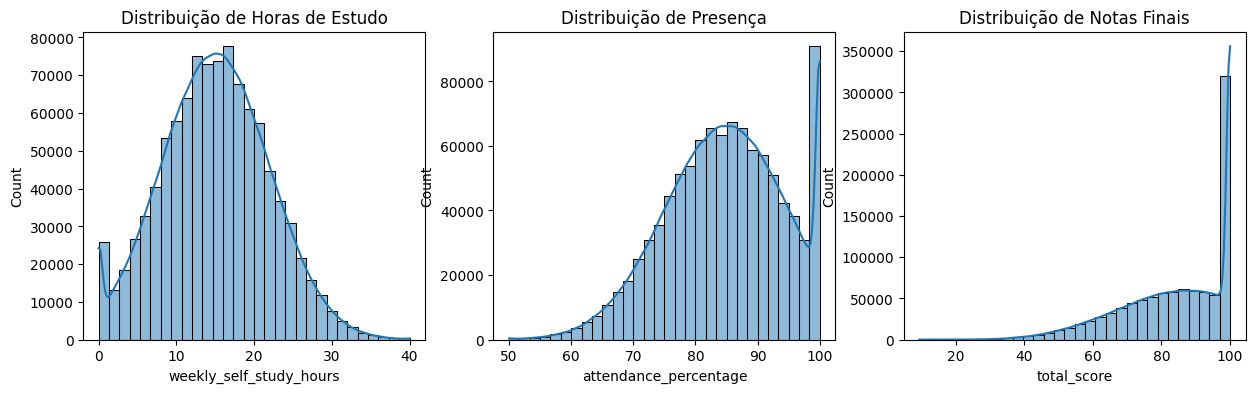

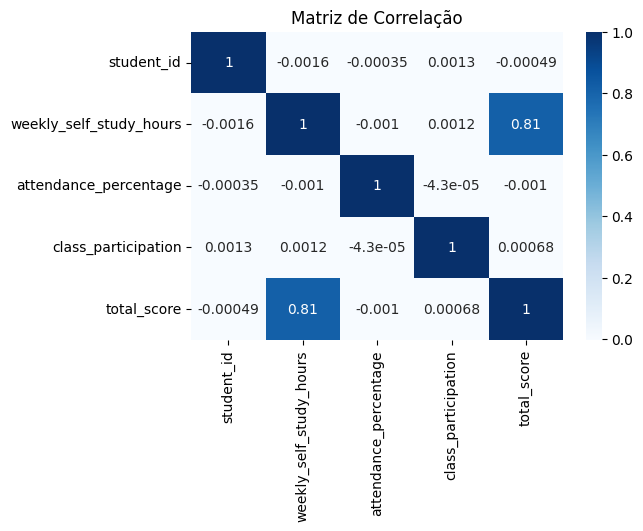

In [18]:
print(df.describe())

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df['weekly_self_study_hours'], bins=30, kde=True, ax=axs[0])
axs[0].set_title("Distribuição de Horas de Estudo")

sns.histplot(df['attendance_percentage'], bins=30, kde=True, ax=axs[1])
axs[1].set_title("Distribuição de Presença")

sns.histplot(df['total_score'], bins=30, kde=True, ax=axs[2])
axs[2].set_title("Distribuição de Notas Finais")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Matriz de Correlação")
plt.show()



--- Regressão Linear Simples ---
MAE: 7.161324064837911
RMSE: 80.93499659297578
R²: 0.6600435613904074


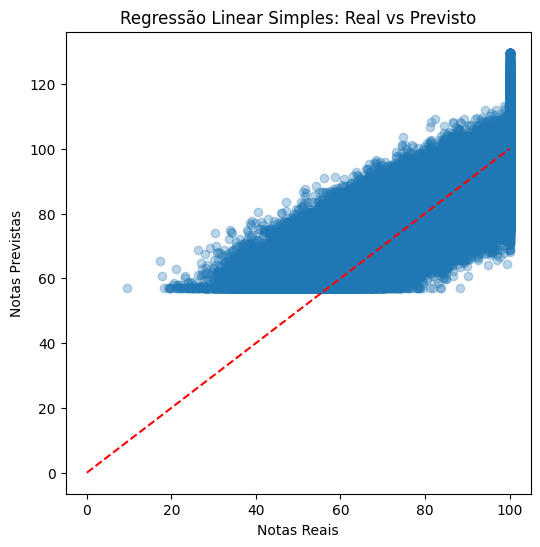


--- Regressão Linear Múltipla ---
MAE: 7.161333476729997
RMSE: 80.9352286743695
R²: 0.6600425865640975
Coeficientes: {'weekly_self_study_hours': np.float64(1.8168200275583486), 'attendance_percentage': np.float64(0.00040175074313641935), 'class_participation': np.float64(-0.002755620936487001)}


In [19]:
X_simple = df[['weekly_self_study_hours']]
y = df['total_score']

X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print("\n--- Regressão Linear Simples ---")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Notas Reais")
plt.ylabel("Notas Previstas")
plt.title("Regressão Linear Simples: Real vs Previsto")
plt.plot([0,100],[0,100],'r--')
plt.show()

X_multi = df[['weekly_self_study_hours','attendance_percentage','class_participation']]
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_train, y_train)
y_pred_multi = lin_reg_multi.predict(X_test)

print("\n--- Regressão Linear Múltipla ---")
print("MAE:", mean_absolute_error(y_test, y_pred_multi))
print("RMSE:", mean_squared_error(y_test, y_pred_multi))
print("R²:", r2_score(y_test, y_pred_multi))
print("Coeficientes:", dict(zip(X_multi.columns, lin_reg_multi.coef_)))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression:
Accuracy: 0.64357
              precision    recall  f1-score   support

           F       0.13      0.74      0.22      1241
           D       0.27      0.32      0.29      8999
           C       0.42      0.43      0.43     28396
           B       0.48      0.53      0.50     51635
           A       0.89      0.78      0.83    109729

    accuracy                           0.64    200000
   macro avg       0.44      0.56      0.45    200000
weighted avg       0.68      0.64      0.66    200000


Random Forest:
Accuracy: 0.641245
              precision    recall  f1-score   support

           F       0.12      0.06      0.08      1241
           D       0.36      0.31      0.33      8999
           C       0.41      0.41      0.41     28396
           B       0.45      0.44      0.44     51635
           A       0.81      0.83      0.82    109729

    accuracy                           0.64    200000
   macro avg       0.43      0.41      0.42    200000
we

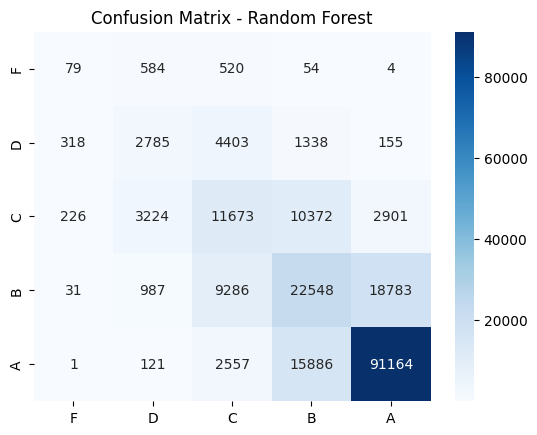

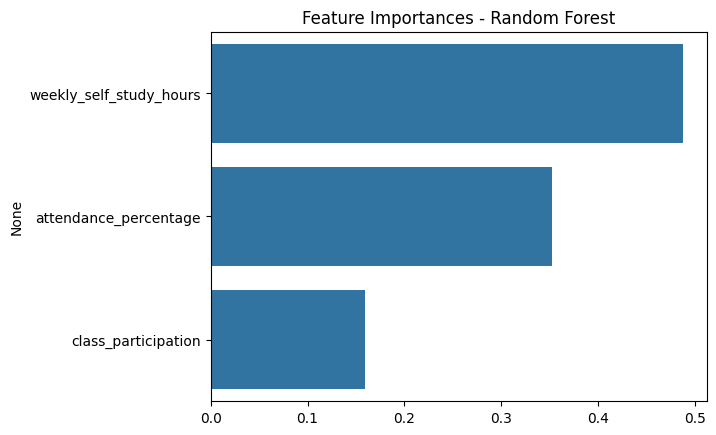

In [20]:
mapa = {'A':4,'B':3,'C':2,'D':1,'F':0}
y_class = df['grade'].map(mapa)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_multi, y_class, test_size=0.2, random_state=42, stratify=y_class
)


scaler = StandardScaler()
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)


logreg = LogisticRegression(
    multi_class='multinomial',
    max_iter=2000,
    class_weight='balanced',
    solver='lbfgs'
)
logreg.fit(X_train_c_scaled, y_train_c)
y_pred_log = logreg.predict(X_test_c_scaled)

print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test_c, y_pred_log))
print(classification_report(
    y_test_c, y_pred_log,
    target_names=['F','D','C','B','A'],
    zero_division=0
))


rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train_c, y_train_c)
y_pred_rf = rf.predict(X_test_c)

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test_c, y_pred_rf))
print(classification_report(
    y_test_c, y_pred_rf,
    target_names=['F','D','C','B','A'],
    zero_division=0
))

cm = confusion_matrix(y_test_c, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['F','D','C','B','A'],
            yticklabels=['F','D','C','B','A'])
plt.title("Confusion Matrix - Random Forest")
plt.show()


sns.barplot(x=rf.feature_importances_, y=X_multi.columns)
plt.title("Feature Importances - Random Forest")
plt.show()


In [21]:
print("""
 Conclusões:
- A regressão mostrou que 'horas de estudo' é o fator mais determinante na nota final.
- Presença e participação têm pouco impacto adicional na previsão.
- A regressão múltipla não trouxe ganho expressivo em relação à simples.
- Para classificação de notas (A-F), Logistic Regression e Random Forest tiveram ~65–70% de acurácia.
- Random Forest destacou que 'horas de estudo' é a variável mais importante, seguida por presença.
  Em resumo: estudar mais horas é o principal fator para melhor desempenho dos alunos.
""")



 Conclusões:
- A regressão mostrou que 'horas de estudo' é o fator mais determinante na nota final.
- Presença e participação têm pouco impacto adicional na previsão.
- A regressão múltipla não trouxe ganho expressivo em relação à simples.
- Para classificação de notas (A-F), Logistic Regression e Random Forest tiveram ~65–70% de acurácia.
- Random Forest destacou que 'horas de estudo' é a variável mais importante, seguida por presença.
  Em resumo: estudar mais horas é o principal fator para melhor desempenho dos alunos.

